In [20]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
from matplotlib.axis import Axis
import mpl_interactions
from mpl_interactions import ioff, panhandler, zoom_factory
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons 

import IPython.display as ipd
import math
import tensorflow as tf

In [5]:
!pip install ydata_synthetic

In [21]:
df = pd.read_csv("RSH_sys.csv")

In [18]:
!pip install pmlb

In [10]:
from ydata_synthetic import synthesizers

# List all available synthesizers to find the correct one
print(dir(synthesizers))

['CGAN', 'CRAMERGAN', 'CTGAN', 'CWGANGP', 'DRAGAN', 'DoppelGANgerNetwork', 'GMM', 'TimeGAN', 'VanillaGAN', 'WGAN', 'WGAN_GP', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__warningregistry__', 'base', 'regular', 'timeseries', 'warn']


C:\Users\kopal\AppData\Local\Temp\ipykernel_31904\1449302770.py:1: DeprecationWarning: `import ydata_synthetic.synthesizers` is deprecated. Please use `import ydata.sdk.synthesizers` instead.For more information check https://docs.synthetic.ydata.ai/latest and https://docs.fabric.ydata.ai/latest/sdk
  from ydata_synthetic import synthesizers


In [32]:
from ydata_synthetic import synthesizers
print(dir(synthesizers))

['CGAN', 'CRAMERGAN', 'CTGAN', 'CWGANGP', 'DRAGAN', 'DoppelGANgerNetwork', 'GMM', 'TimeGAN', 'VanillaGAN', 'WGAN', 'WGAN_GP', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__warningregistry__', 'base', 'regular', 'timeseries', 'warn']


In [34]:
from ydata_synthetic.synthesizers import timeseries
print(dir(timeseries))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'doppelganger', 'timegan', 'warn']


In [66]:
import pmlb
from pmlb import fetch_data

from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters

ImportError: cannot import name 'ModelParameters' from 'ydata_synthetic.synthesizers' (C:\Users\kopal\anaconda\Lib\site-packages\ydata_synthetic\synthesizers\__init__.py)

In [7]:
df

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,0.700554,0.179326,248.032204,285.076412,477.781705,0.013527,-299.820465,187.131546,78.579834,4.631160,-2.487361,16.789047,19.310366,7.787469,5.044958,12.138338,13.040179,4.626700,-0.645123,ESM
1,0.592855,0.006087,2113.997527,2514.710969,4833.065326,0.121620,-434.920288,93.765190,8.517176,32.632271,10.405182,19.304220,3.152812,7.385262,-0.755521,4.398435,-4.349046,-0.047730,-4.378016,ESM
2,0.670227,0.083673,401.155936,395.897938,806.223954,0.025393,-321.828247,166.044983,53.224960,-9.898413,0.990090,25.774899,18.794027,-1.118934,-1.721275,10.347832,10.995036,0.843135,-2.205780,ESM
3,0.681834,0.034500,361.790576,401.290251,781.567383,0.020063,-408.409607,160.513260,54.198860,-7.309638,0.583620,23.807470,18.878597,1.279076,1.074646,13.185719,14.412134,3.725852,-1.398204,ESM
4,0.681717,0.080862,284.959442,369.038392,598.204776,0.013412,-383.068970,153.250717,60.247231,4.464465,7.754785,24.782110,18.714687,2.640419,2.077545,12.485372,13.634929,4.383650,-0.105024,ESM
5,0.704622,0.043231,409.945419,425.409778,843.383789,0.020608,-410.402557,195.610977,53.901394,-21.675465,-3.412969,28.825935,18.931257,-4.970737,-2.302830,14.535142,14.187539,0.756782,-1.585673,ESM
6,0.670739,0.068303,151.064744,475.252795,200.158049,0.006523,-481.871796,78.481277,67.794258,54.390820,40.951405,29.986036,22.526579,18.110832,15.385611,13.086635,10.524501,7.629659,4.704433,ESM
7,0.681805,0.101290,383.858124,367.770968,735.993840,0.023725,-346.706665,244.459686,68.236168,-27.528755,-9.572905,27.197012,15.698574,-11.518016,-7.794332,11.948217,12.042163,-2.022321,-3.400136,ESM
8,0.683485,0.044893,364.015705,376.180413,737.109717,0.021338,-417.073731,209.816040,63.171238,-18.080496,-5.175992,23.450844,13.640928,-6.804003,-0.617162,16.928156,14.933130,-0.253551,-3.661477,ESM
9,0.637657,0.119126,250.370465,287.444552,473.689738,0.013876,-357.164185,222.228134,79.593193,-3.155931,3.261338,26.695599,16.163900,-3.384718,1.872584,17.195873,14.045848,-1.150620,-4.986147,ESM


In [11]:
num_cols = ["chroma_stft","rmse","spectral_centroid","spectral_bandwidth","rolloff","zero_crossing_rate","mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13"]
cat_cols = ["Target"]

In [87]:
synth = RegularSynthesizer(modelname='fast')
synth.fit(data=df, num_cols=num_cols, cat_cols=cat_cols)

Hyperparameter search: 100%|██████████| 8/8 [00:00<00:00, 40.79it/s]


In [88]:
synth_data = synth.sample(10000)
print(synth_data)

      chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0        0.719142  0.135178        -165.933331          -47.379618   
1        0.694772  0.087999        -621.212172         -746.529065   
2        0.651002  0.056550         506.747797          597.995717   
3        0.656254  0.055818        1030.235886         1066.422386   
4        0.639838  0.044033         661.240508          954.817563   
...           ...       ...                ...                 ...   
9995     0.689515  0.076872         258.425881          423.035805   
9996     0.673742  0.089625         188.162419          398.460743   
9997     0.638942  0.053872         310.914935          379.506980   
9998     0.609197  0.075928         389.123990          380.691516   
9999     0.609892  0.091390         306.066179          335.875618   

          rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
0     -514.398424           -0.010471 -378.319636  104.202241  79.188034   
1    -1

In [10]:
 synth_data.to_csv("ESM_PSM.csv")

In [13]:
df2 = pd.read_csv("RSH murmur category.csv")

In [89]:
synth = RegularSynthesizer(modelname='fast')
synth.fit(data=df2, num_cols=num_cols, cat_cols=cat_cols)

Hyperparameter search: 100%|██████████| 8/8 [00:00<00:00, 41.19it/s]


In [90]:
synth_data2 = synth.sample(10000)
print(synth_data2)

      chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0        0.600282  0.032055         975.673986          908.342099   
1        0.617426  0.019664        1079.554303          966.674815   
2        0.600961  0.019459         954.274584          926.004968   
3        0.546838  0.040120         652.849988          755.556932   
4        0.569667  0.035256         673.328797          842.325462   
...           ...       ...                ...                 ...   
9995     0.473242  0.124510         420.994882          524.537355   
9996     0.441409  0.140884         382.011242          547.042152   
9997     0.511362  0.105468         477.197093          499.007696   
9998     0.498175  0.112019         457.846159          512.931843   
9999     0.444187  0.139294         379.465777          542.668975   

          rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  \
0     1931.476780            0.071657 -388.977430  176.043904 -25.175567   
1     2

In [91]:
count = 0
for i in range(0,10000):
    if (synth_data['Target'][i]==0):
        count+=1
count

6427

In [93]:
synth_data

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0.719142,0.135178,-165.933331,-47.379618,-514.398424,-0.010471,-378.319636,104.202241,79.188034,34.954131,23.071209,20.505457,23.409195,16.916834,14.791230,14.295122,16.043195,10.092481,5.135840,0
1,0.694772,0.087999,-621.212172,-746.529065,-1567.566417,-0.035421,-425.158439,194.775353,95.583460,-6.301470,16.001581,34.806927,26.719749,-4.000396,3.683162,18.323423,20.788935,2.420457,1.803972,0
2,0.651002,0.056550,506.747797,597.995717,1059.984725,0.027675,-425.870131,222.480443,65.746248,-10.134959,1.436293,30.827419,17.283758,-4.995135,-2.137785,14.220279,10.691128,-3.087348,-5.608167,0
3,0.656254,0.055818,1030.235886,1066.422386,2292.370652,0.060259,-368.785289,199.367737,42.005594,-21.284562,-12.378242,20.804502,9.012346,-8.762942,-6.949660,10.766177,8.016581,-1.618751,-3.886613,0
4,0.639838,0.044033,661.240508,954.817563,1325.159708,0.038210,-452.557950,131.431450,50.385612,27.018590,26.732960,33.700714,17.507323,6.143981,5.632325,11.580891,5.894229,0.600613,-0.251750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.689515,0.076872,258.425881,423.035805,527.280866,0.011320,-445.231995,159.883541,59.141033,6.155687,18.943156,39.552186,28.392059,6.938196,4.531807,13.214801,11.425189,1.641358,-0.747199,1
9996,0.673742,0.089625,188.162419,398.460743,333.376807,0.009376,-432.928628,113.614841,66.302645,36.549073,33.370300,34.882962,25.095813,11.895674,8.057759,10.618507,9.433851,4.115824,1.736483,1
9997,0.638942,0.053872,310.914935,379.506980,620.592933,0.016495,-440.926608,196.024133,61.962416,-6.054885,12.469465,36.691797,18.771812,-5.318223,1.331951,18.093140,13.338418,-2.685058,-4.337909,1
9998,0.609197,0.075928,389.123990,380.691516,816.384417,0.023437,-339.634072,206.665420,56.396786,-23.072351,-3.068783,30.830871,20.182434,-4.622487,-1.966489,13.984855,10.717513,-5.534399,-8.394723,1


In [92]:
count = 0
for i in range(0,10000):
    if (synth_data2['Target'][i]==0):
        count+=1
count

5126

In [17]:
 synth_data.to_csv("sys_dias.csv")

In [9]:
data1['label'] = data1['label'].astype('category')
# Assigning numerical values and storing in another column
data1['Target'] = data1['label'].cat.codes
data1

KeyError: 'label'

In [11]:
data1

,Unnamed: 0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Target
0,0,-455.13736,32.117508,67.037240,77.664734,49.664658,25.880259,24.391785,26.454983,17.030998,...,2.648876,-0.864282,2.420814,6.688178,4.282985,0.341899,1.747920,4.891902,3.044659,1
1,1,-354.22824,175.025530,82.428680,20.072756,10.034512,21.328854,18.868486,4.995036,-0.309094,...,-4.300250,-2.564156,1.583124,2.241213,-0.127677,-0.752028,0.281222,-0.203877,-2.086515,1
2,2,-382.03625,225.977740,72.785670,-8.900095,-5.091794,17.019112,6.358070,-12.566879,-6.314266,...,-2.764105,2.877731,6.261957,3.359197,0.703554,2.405258,2.614883,-0.813624,-2.739512,1
3,3,-408.18347,162.125020,71.404335,11.888519,21.987108,38.676270,28.279007,12.859214,16.979382,...,-5.325066,-1.250458,-3.050236,-8.082791,-7.337514,-2.662307,-0.564172,-1.577129,-0.458390,1
4,4,-363.65137,145.418380,60.012300,18.270243,14.665586,24.535477,18.216152,3.149241,-1.613631,...,1.731811,3.653979,8.055156,8.927787,5.442888,3.523749,3.038727,1.672799,-0.310652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,-379.79926,138.228600,25.617903,-10.035057,-7.285172,11.930647,4.241311,-4.080345,-4.196722,...,-2.315201,1.164186,1.656615,0.809283,-1.657954,1.777278,2.982578,2.977653,-0.846073,0
9996,9996,-452.80185,167.352280,82.983570,26.307800,17.742025,26.381144,21.348406,6.511578,4.591986,...,-0.072750,1.760583,5.656949,3.480098,-0.513401,-2.560431,-0.818707,0.511741,0.518246,2
9997,9997,-281.95380,173.571010,55.175785,-7.482202,17.180826,43.625370,21.576668,-12.103433,-7.718857,...,0.503126,5.909680,6.270297,-0.453508,-1.571873,1.643757,3.066946,-0.075463,0.464719,2
9998,9998,-444.02573,221.917450,54.899933,-32.462520,2.473376,38.340046,22.458418,-7.922908,-2.362509,...,-0.332689,5.460774,6.899157,-0.716742,-2.591087,1.679681,4.755436,0.495458,-1.000482,2


In [37]:
data1 = data1.drop(['label'], axis=1)
data1

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0,0.719142,0.135178,-165.933331,-47.379618,-514.398424,-0.010471,-378.319636,104.202241,79.188034,...,23.071209,20.505457,23.409195,16.916834,14.791230,14.295122,16.043195,10.092481,5.135840,0
1,1,0.694772,0.087999,-621.212172,-746.529065,-1567.566417,-0.035421,-425.158439,194.775353,95.583460,...,16.001581,34.806927,26.719749,-4.000396,3.683162,18.323423,20.788935,2.420457,1.803972,0
2,2,0.651002,0.056550,506.747797,597.995717,1059.984725,0.027675,-425.870131,222.480443,65.746248,...,1.436293,30.827419,17.283758,-4.995135,-2.137785,14.220279,10.691128,-3.087348,-5.608167,0
3,3,0.656254,0.055818,1030.235886,1066.422386,2292.370652,0.060259,-368.785289,199.367737,42.005594,...,-12.378242,20.804502,9.012346,-8.762942,-6.949660,10.766177,8.016581,-1.618751,-3.886613,0
4,4,0.639838,0.044033,661.240508,954.817563,1325.159708,0.038210,-452.557950,131.431450,50.385612,...,26.732960,33.700714,17.507323,6.143981,5.632325,11.580891,5.894229,0.600613,-0.251750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.741646,0.077994,383.771925,414.392464,934.983112,0.016866,-336.543305,237.219079,42.698047,...,-16.551573,36.566387,26.462161,-5.081183,-0.573590,21.572200,18.319636,-1.620110,-3.761758,1
996,996,0.650950,0.081285,302.088410,355.250083,596.245577,0.016156,-362.333254,180.511215,65.536586,...,1.210331,23.538081,19.166017,2.690133,2.739487,13.101536,11.970546,0.501578,-3.624782,1
997,997,0.643771,0.109170,290.219952,367.651527,582.311833,0.014083,-371.320623,177.752965,66.227137,...,8.621801,27.851143,19.359148,3.145977,6.387098,17.565852,14.375452,1.897127,-2.024783,1
998,998,0.590353,0.136961,209.249020,306.810332,367.674853,0.013268,-353.453359,126.425359,80.641909,...,17.761507,20.348592,23.880279,15.758749,4.397934,2.044515,5.309427,3.691774,-1.960543,1


In [58]:
data2 = data2.drop(['label'], axis=1)
data2

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0,0.580841,0.031795,798.595334,877.770267,1624.318185,0.053666,-404.943567,187.608340,-30.922700,...,44.104381,-14.240953,19.834544,16.818087,-14.599227,9.810463,3.176509,-13.768520,5.505503,0
1,1,0.576926,0.037881,857.116536,842.421309,1668.309740,0.060473,-389.387881,167.288609,-10.127612,...,24.766730,-23.223696,5.251876,4.890954,-17.042534,3.211511,-2.041646,-13.574676,3.564405,0
2,2,0.567412,0.038922,808.423521,816.692773,1556.730808,0.056404,-397.344668,163.864199,-7.486101,...,30.202571,-14.175105,8.937457,8.456150,-14.504388,2.702555,-0.560801,-13.428627,0.900387,0
3,3,0.547617,0.038480,675.010739,762.797363,1291.816089,0.040141,-403.372810,165.695529,8.111494,...,20.181136,-21.355882,2.210165,1.828406,-15.027631,2.240993,-2.614150,-10.686614,4.317034,0
4,4,0.566408,0.041629,768.286121,808.584532,1490.075282,0.050406,-383.320549,169.760862,-4.780617,...,25.046260,-21.671014,5.678833,4.872274,-16.101182,3.693429,-1.696742,-12.408659,4.281651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.596812,0.062831,595.848509,442.432881,1365.454748,0.044649,-463.330734,155.521737,112.225463,...,-2.576648,-10.169599,-5.988159,12.083403,15.383517,0.096615,-4.678009,-4.673554,-3.623423,0
996,996,0.536910,0.093413,514.052089,480.412910,1028.913557,0.034683,-413.040598,165.443933,79.664111,...,14.358408,-6.599189,3.060823,12.452621,6.538206,2.099659,-3.817543,-7.968571,-2.463294,0
997,997,0.508142,0.107026,476.196236,499.893050,879.131808,0.030370,-390.441977,169.973920,64.786739,...,22.111668,-4.885946,7.179362,12.584129,2.569905,2.944375,-3.432153,-9.449212,-1.981985,0
998,998,0.414577,0.154743,337.093307,565.150191,368.495352,0.015500,-312.685972,185.336356,13.432939,...,48.872379,0.924239,21.415412,13.311548,-11.294522,5.990190,-2.020633,-14.706598,-0.201799,0


In [38]:
data1 = data1.drop(data1.columns[data1.columns.str.contains('Unnamed', case=False)], axis=1)
data1

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0.719142,0.135178,-165.933331,-47.379618,-514.398424,-0.010471,-378.319636,104.202241,79.188034,34.954131,23.071209,20.505457,23.409195,16.916834,14.791230,14.295122,16.043195,10.092481,5.135840,0
1,0.694772,0.087999,-621.212172,-746.529065,-1567.566417,-0.035421,-425.158439,194.775353,95.583460,-6.301470,16.001581,34.806927,26.719749,-4.000396,3.683162,18.323423,20.788935,2.420457,1.803972,0
2,0.651002,0.056550,506.747797,597.995717,1059.984725,0.027675,-425.870131,222.480443,65.746248,-10.134959,1.436293,30.827419,17.283758,-4.995135,-2.137785,14.220279,10.691128,-3.087348,-5.608167,0
3,0.656254,0.055818,1030.235886,1066.422386,2292.370652,0.060259,-368.785289,199.367737,42.005594,-21.284562,-12.378242,20.804502,9.012346,-8.762942,-6.949660,10.766177,8.016581,-1.618751,-3.886613,0
4,0.639838,0.044033,661.240508,954.817563,1325.159708,0.038210,-452.557950,131.431450,50.385612,27.018590,26.732960,33.700714,17.507323,6.143981,5.632325,11.580891,5.894229,0.600613,-0.251750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.741646,0.077994,383.771925,414.392464,934.983112,0.016866,-336.543305,237.219079,42.698047,-53.433175,-16.551573,36.566387,26.462161,-5.081183,-0.573590,21.572200,18.319636,-1.620110,-3.761758,1
996,0.650950,0.081285,302.088410,355.250083,596.245577,0.016156,-362.333254,180.511215,65.536586,-3.189451,1.210331,23.538081,19.166017,2.690133,2.739487,13.101536,11.970546,0.501578,-3.624782,1
997,0.643771,0.109170,290.219952,367.651527,582.311833,0.014083,-371.320623,177.752965,66.227137,2.416332,8.621801,27.851143,19.359148,3.145977,6.387098,17.565852,14.375452,1.897127,-2.024783,1
998,0.590353,0.136961,209.249020,306.810332,367.674853,0.013268,-353.453359,126.425359,80.641909,37.082703,17.761507,20.348592,23.880279,15.758749,4.397934,2.044515,5.309427,3.691774,-1.960543,1


In [59]:
data2 = data2.drop(data2.columns[data2.columns.str.contains('Unnamed', case=False)], axis=1)
data2

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0.580841,0.031795,798.595334,877.770267,1624.318185,0.053666,-404.943567,187.608340,-30.922700,33.735221,44.104381,-14.240953,19.834544,16.818087,-14.599227,9.810463,3.176509,-13.768520,5.505503,0
1,0.576926,0.037881,857.116536,842.421309,1668.309740,0.060473,-389.387881,167.288609,-10.127612,27.682424,24.766730,-23.223696,5.251876,4.890954,-17.042534,3.211511,-2.041646,-13.574676,3.564405,0
2,0.567412,0.038922,808.423521,816.692773,1556.730808,0.056404,-397.344668,163.864199,-7.486101,26.572977,30.202571,-14.175105,8.937457,8.456150,-14.504388,2.702555,-0.560801,-13.428627,0.900387,0
3,0.547617,0.038480,675.010739,762.797363,1291.816089,0.040141,-403.372810,165.695529,8.111494,29.405590,20.181136,-21.355882,2.210165,1.828406,-15.027631,2.240993,-2.614150,-10.686614,4.317034,0
4,0.566408,0.041629,768.286121,808.584532,1490.075282,0.050406,-383.320549,169.760862,-4.780617,29.567292,25.046260,-21.671014,5.678833,4.872274,-16.101182,3.693429,-1.696742,-12.408659,4.281651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.596812,0.062831,595.848509,442.432881,1365.454748,0.044649,-463.330734,155.521737,112.225463,37.220074,-2.576648,-10.169599,-5.988159,12.083403,15.383517,0.096615,-4.678009,-4.673554,-3.623423,0
996,0.536910,0.093413,514.052089,480.412910,1028.913557,0.034683,-413.040598,165.443933,79.664111,41.623790,14.358408,-6.599189,3.060823,12.452621,6.538206,2.099659,-3.817543,-7.968571,-2.463294,0
997,0.508142,0.107026,476.196236,499.893050,879.131808,0.030370,-390.441977,169.973920,64.786739,43.719687,22.111668,-4.885946,7.179362,12.584129,2.569905,2.944375,-3.432153,-9.449212,-1.981985,0
998,0.414577,0.154743,337.093307,565.150191,368.495352,0.015500,-312.685972,185.336356,13.432939,50.780126,48.872379,0.924239,21.415412,13.311548,-11.294522,5.990190,-2.020633,-14.706598,-0.201799,0


In [20]:
df2['label'] = df2['label'].astype('category')
# Assigning numerical values and storing in another column
df2['Target'] = df2['label'].cat.codes
df2

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label,Target
0,0.672787,0.031550,2632.118871,2864.885357,5910.268062,0.049081,-323.043976,74.457459,16.906425,21.304873,...,8.799951,4.394418,4.943507,-0.532680,3.007049,1.550910,1.167374,-1.465614,systolic,1
1,0.325506,0.049496,872.662941,1404.484803,1895.359097,0.006121,-435.822022,54.942528,22.862726,19.565060,...,10.418115,8.022697,5.849261,3.191375,3.348991,2.751986,1.705834,0.961521,systolic,1
2,0.705090,0.104478,1042.770637,1196.428335,2219.143399,0.052268,-403.926422,76.706764,39.414467,46.593308,...,18.534910,17.709049,6.884749,10.727037,5.836975,3.962209,5.811176,0.637192,systolic,1
3,0.607851,0.028342,1017.050486,924.838630,1951.147461,0.083346,-394.469757,160.609543,-26.471912,26.402561,...,-19.639898,9.635927,9.681887,-17.562805,3.264523,-0.826279,-16.287575,0.877645,systolic,1
4,0.737599,0.031450,2534.989321,2999.254299,6103.434022,0.011810,-323.788666,81.515358,26.414169,23.224833,...,14.386477,7.856832,9.606100,4.552522,6.396647,6.540001,5.357007,3.901673,systolic,1
5,0.276089,0.067807,702.047588,1212.322317,1399.732627,0.004707,-418.185242,56.236980,22.179367,16.247894,...,8.525810,6.312475,5.100512,3.791923,2.982098,1.276537,0.543619,0.445093,systolic,1
6,0.529712,0.072474,636.097293,731.830835,1265.040953,0.037478,-393.443451,161.979416,18.396551,35.905457,...,-11.132367,7.821357,6.397702,-11.622669,3.156970,-0.138875,-11.046802,-0.929170,systolic,1
7,0.464383,0.070395,1475.305457,1924.022632,3511.570672,0.010168,-459.089294,93.972321,61.099789,30.859608,...,9.232485,7.142753,4.460721,1.662457,0.218123,0.260800,0.589867,0.733824,systolic,1
8,0.607851,0.028342,1017.050486,924.838630,1951.147461,0.083346,-394.469757,160.609543,-26.471912,26.402561,...,-19.639898,9.635927,9.681887,-17.562805,3.264523,-0.826279,-16.287575,0.877645,systolic,1
9,0.690540,0.070385,949.318607,1153.126938,2033.790129,0.042552,-443.411560,77.912766,40.355995,46.204311,...,18.035364,17.106686,6.355259,10.727554,5.519258,3.269871,5.686362,1.092396,systolic,1


In [21]:
df2 = df2.drop(['label'], axis=1)
df2

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,Target
0,0.672787,0.031550,2632.118871,2864.885357,5910.268062,0.049081,-323.043976,74.457459,16.906425,21.304873,12.912302,8.799951,4.394418,4.943507,-0.532680,3.007049,1.550910,1.167374,-1.465614,1
1,0.325506,0.049496,872.662941,1404.484803,1895.359097,0.006121,-435.822022,54.942528,22.862726,19.565060,12.697655,10.418115,8.022697,5.849261,3.191375,3.348991,2.751986,1.705834,0.961521,1
2,0.705090,0.104478,1042.770637,1196.428335,2219.143399,0.052268,-403.926422,76.706764,39.414467,46.593308,24.555054,18.534910,17.709049,6.884749,10.727037,5.836975,3.962209,5.811176,0.637192,1
3,0.607851,0.028342,1017.050486,924.838630,1951.147461,0.083346,-394.469757,160.609543,-26.471912,26.402561,33.087566,-19.639898,9.635927,9.681887,-17.562805,3.264523,-0.826279,-16.287575,0.877645,1
4,0.737599,0.031450,2534.989321,2999.254299,6103.434022,0.011810,-323.788666,81.515358,26.414169,23.224833,11.632070,14.386477,7.856832,9.606100,4.552522,6.396647,6.540001,5.357007,3.901673,1
5,0.276089,0.067807,702.047588,1212.322317,1399.732627,0.004707,-418.185242,56.236980,22.179367,16.247894,11.002275,8.525810,6.312475,5.100512,3.791923,2.982098,1.276537,0.543619,0.445093,1
6,0.529712,0.072474,636.097293,731.830835,1265.040953,0.037478,-393.443451,161.979416,18.396551,35.905457,28.185900,-11.132367,7.821357,6.397702,-11.622669,3.156970,-0.138875,-11.046802,-0.929170,1
7,0.464383,0.070395,1475.305457,1924.022632,3511.570672,0.010168,-459.089294,93.972321,61.099789,30.859608,14.513968,9.232485,7.142753,4.460721,1.662457,0.218123,0.260800,0.589867,0.733824,1
8,0.607851,0.028342,1017.050486,924.838630,1951.147461,0.083346,-394.469757,160.609543,-26.471912,26.402561,33.087566,-19.639898,9.635927,9.681887,-17.562805,3.264523,-0.826279,-16.287575,0.877645,1
9,0.690540,0.070385,949.318607,1153.126938,2033.790129,0.042552,-443.411560,77.912766,40.355995,46.204311,23.544491,18.035364,17.106686,6.355259,10.727554,5.519258,3.269871,5.686362,1.092396,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [13]:
synth_data = pd.read_csv("synth_data.csv")

In [15]:
synth_data2 = pd.read_csv("gen_data.csv")

In [23]:
data2['label'] = data2['label'].astype('category')
# Assigning numerical values and storing in another column
data2['Target'] = data2['label'].cat.codes
data2

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label,Target
0,0,0.580841,0.031795,798.595334,877.770267,1624.318185,0.053666,-404.943567,187.608340,-30.922700,...,-14.240953,19.834544,16.818087,-14.599227,9.810463,3.176509,-13.768520,5.505503,diastolic,0
1,1,0.576926,0.037881,857.116536,842.421309,1668.309740,0.060473,-389.387881,167.288609,-10.127612,...,-23.223696,5.251876,4.890954,-17.042534,3.211511,-2.041646,-13.574676,3.564405,diastolic,0
2,2,0.567412,0.038922,808.423521,816.692773,1556.730808,0.056404,-397.344668,163.864199,-7.486101,...,-14.175105,8.937457,8.456150,-14.504388,2.702555,-0.560801,-13.428627,0.900387,diastolic,0
3,3,0.547617,0.038480,675.010739,762.797363,1291.816089,0.040141,-403.372810,165.695529,8.111494,...,-21.355882,2.210165,1.828406,-15.027631,2.240993,-2.614150,-10.686614,4.317034,diastolic,0
4,4,0.566408,0.041629,768.286121,808.584532,1490.075282,0.050406,-383.320549,169.760862,-4.780617,...,-21.671014,5.678833,4.872274,-16.101182,3.693429,-1.696742,-12.408659,4.281651,diastolic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.596812,0.062831,595.848509,442.432881,1365.454748,0.044649,-463.330734,155.521737,112.225463,...,-10.169599,-5.988159,12.083403,15.383517,0.096615,-4.678009,-4.673554,-3.623423,diastolic,0
996,996,0.536910,0.093413,514.052089,480.412910,1028.913557,0.034683,-413.040598,165.443933,79.664111,...,-6.599189,3.060823,12.452621,6.538206,2.099659,-3.817543,-7.968571,-2.463294,diastolic,0
997,997,0.508142,0.107026,476.196236,499.893050,879.131808,0.030370,-390.441977,169.973920,64.786739,...,-4.885946,7.179362,12.584129,2.569905,2.944375,-3.432153,-9.449212,-1.981985,diastolic,0
998,998,0.414577,0.154743,337.093307,565.150191,368.495352,0.015500,-312.685972,185.336356,13.432939,...,0.924239,21.415412,13.311548,-11.294522,5.990190,-2.020633,-14.706598,-0.201799,diastolic,0


In [46]:
data1

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,0,0.719142,0.135178,-165.933331,-47.379618,-514.398424,-0.010471,-378.319636,104.202241,79.188034,...,23.071209,20.505457,23.409195,16.916834,14.791230,14.295122,16.043195,10.092481,5.135840,ESM
1,1,0.694772,0.087999,-621.212172,-746.529065,-1567.566417,-0.035421,-425.158439,194.775353,95.583460,...,16.001581,34.806927,26.719749,-4.000396,3.683162,18.323423,20.788935,2.420457,1.803972,ESM
2,2,0.651002,0.056550,506.747797,597.995717,1059.984725,0.027675,-425.870131,222.480443,65.746248,...,1.436293,30.827419,17.283758,-4.995135,-2.137785,14.220279,10.691128,-3.087348,-5.608167,ESM
3,3,0.656254,0.055818,1030.235886,1066.422386,2292.370652,0.060259,-368.785289,199.367737,42.005594,...,-12.378242,20.804502,9.012346,-8.762942,-6.949660,10.766177,8.016581,-1.618751,-3.886613,ESM
4,4,0.639838,0.044033,661.240508,954.817563,1325.159708,0.038210,-452.557950,131.431450,50.385612,...,26.732960,33.700714,17.507323,6.143981,5.632325,11.580891,5.894229,0.600613,-0.251750,ESM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.741646,0.077994,383.771925,414.392464,934.983112,0.016866,-336.543305,237.219079,42.698047,...,-16.551573,36.566387,26.462161,-5.081183,-0.573590,21.572200,18.319636,-1.620110,-3.761758,PSM
996,996,0.650950,0.081285,302.088410,355.250083,596.245577,0.016156,-362.333254,180.511215,65.536586,...,1.210331,23.538081,19.166017,2.690133,2.739487,13.101536,11.970546,0.501578,-3.624782,PSM
997,997,0.643771,0.109170,290.219952,367.651527,582.311833,0.014083,-371.320623,177.752965,66.227137,...,8.621801,27.851143,19.359148,3.145977,6.387098,17.565852,14.375452,1.897127,-2.024783,PSM
998,998,0.590353,0.136961,209.249020,306.810332,367.674853,0.013268,-353.453359,126.425359,80.641909,...,17.761507,20.348592,23.880279,15.758749,4.397934,2.044515,5.309427,3.691774,-1.960543,PSM


In [25]:
synth_data = pd.read_csv("synth_data.csv")

In [29]:
synth_data = synth_data[synth_data['Target'] >= 1]

In [31]:
y = synth_data['Target'].copy()
y

0       1
1       1
2       1
3       1
4       1
       ..
9994    2
9996    2
9997    2
9998    2
9999    2
Name: Target, Length: 9565, dtype: int64

In [33]:
y.value_counts()

Target
2    7617
1    1948
Name: count, dtype: int64

In [21]:
y2 = synth_data2['label'].copy()
y2

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: label, Length: 10000, dtype: int64

In [29]:
data1

,Unnamed: 0,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,label
0,0,0.719142,0.135178,-165.933331,-47.379618,-514.398424,-0.010471,-378.319636,104.202241,79.188034,...,23.071209,20.505457,23.409195,16.916834,14.791230,14.295122,16.043195,10.092481,5.135840,ESM
1,1,0.694772,0.087999,-621.212172,-746.529065,-1567.566417,-0.035421,-425.158439,194.775353,95.583460,...,16.001581,34.806927,26.719749,-4.000396,3.683162,18.323423,20.788935,2.420457,1.803972,ESM
2,2,0.651002,0.056550,506.747797,597.995717,1059.984725,0.027675,-425.870131,222.480443,65.746248,...,1.436293,30.827419,17.283758,-4.995135,-2.137785,14.220279,10.691128,-3.087348,-5.608167,ESM
3,3,0.656254,0.055818,1030.235886,1066.422386,2292.370652,0.060259,-368.785289,199.367737,42.005594,...,-12.378242,20.804502,9.012346,-8.762942,-6.949660,10.766177,8.016581,-1.618751,-3.886613,ESM
4,4,0.639838,0.044033,661.240508,954.817563,1325.159708,0.038210,-452.557950,131.431450,50.385612,...,26.732960,33.700714,17.507323,6.143981,5.632325,11.580891,5.894229,0.600613,-0.251750,ESM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.741646,0.077994,383.771925,414.392464,934.983112,0.016866,-336.543305,237.219079,42.698047,...,-16.551573,36.566387,26.462161,-5.081183,-0.573590,21.572200,18.319636,-1.620110,-3.761758,PSM
996,996,0.650950,0.081285,302.088410,355.250083,596.245577,0.016156,-362.333254,180.511215,65.536586,...,1.210331,23.538081,19.166017,2.690133,2.739487,13.101536,11.970546,0.501578,-3.624782,PSM
997,997,0.643771,0.109170,290.219952,367.651527,582.311833,0.014083,-371.320623,177.752965,66.227137,...,8.621801,27.851143,19.359148,3.145977,6.387098,17.565852,14.375452,1.897127,-2.024783,PSM
998,998,0.590353,0.136961,209.249020,306.810332,367.674853,0.013268,-353.453359,126.425359,80.641909,...,17.761507,20.348592,23.880279,15.758749,4.397934,2.044515,5.309427,3.691774,-1.960543,PSM


In [37]:
x = synth_data.drop(columns = ['Unnamed: 0'])
x

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Target
0,-455.13736,32.117508,67.037240,77.664734,49.664658,25.880259,24.391785,26.454983,17.030998,8.447568,...,2.648876,-0.864282,2.420814,6.688178,4.282985,0.341899,1.747920,4.891902,3.044659,1
1,-354.22824,175.025530,82.428680,20.072756,10.034512,21.328854,18.868486,4.995036,-0.309094,5.262074,...,-4.300250,-2.564156,1.583124,2.241213,-0.127677,-0.752028,0.281222,-0.203877,-2.086515,1
2,-382.03625,225.977740,72.785670,-8.900095,-5.091794,17.019112,6.358070,-12.566879,-6.314266,11.879590,...,-2.764105,2.877731,6.261957,3.359197,0.703554,2.405258,2.614883,-0.813624,-2.739512,1
3,-408.18347,162.125020,71.404335,11.888519,21.987108,38.676270,28.279007,12.859214,16.979382,23.939793,...,-5.325066,-1.250458,-3.050236,-8.082791,-7.337514,-2.662307,-0.564172,-1.577129,-0.458390,1
4,-363.65137,145.418380,60.012300,18.270243,14.665586,24.535477,18.216152,3.149241,-1.613631,6.607077,...,1.731811,3.653979,8.055156,8.927787,5.442888,3.523749,3.038727,1.672799,-0.310652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-229.70169,132.014600,41.386387,7.419478,2.347297,18.512890,12.615068,3.642708,1.870183,10.020114,...,-3.344151,-0.947364,0.168603,1.489669,0.629067,1.871580,0.719564,0.093576,-0.404328,2
9996,-452.80185,167.352280,82.983570,26.307800,17.742025,26.381144,21.348406,6.511578,4.591986,10.981310,...,-0.072750,1.760583,5.656949,3.480098,-0.513401,-2.560431,-0.818707,0.511741,0.518246,2
9997,-281.95380,173.571010,55.175785,-7.482202,17.180826,43.625370,21.576668,-12.103433,-7.718857,11.637750,...,0.503126,5.909680,6.270297,-0.453508,-1.571873,1.643757,3.066946,-0.075463,0.464719,2
9998,-444.02573,221.917450,54.899933,-32.462520,2.473376,38.340046,22.458418,-7.922908,-2.362509,16.791283,...,-0.332689,5.460774,6.899157,-0.716742,-2.591087,1.679681,4.755436,0.495458,-1.000482,2


In [97]:
x2 = synth_data2.drop(columns = ['Target'])
x2

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,0.600282,0.032055,975.673986,908.342099,1931.476780,0.071657,-388.977430,176.043904,-25.175567,29.382036,26.143433,-30.430318,6.316626,5.524266,-19.790296,5.639443,-2.061818,-15.051631,6.267077
1,0.617426,0.019664,1079.554303,966.674815,2151.656003,0.084240,-417.542917,178.356130,-40.507723,28.526724,34.265285,-27.163134,12.112656,10.931760,-19.746103,7.336361,-0.106507,-16.827874,5.362748
2,0.600961,0.019459,954.274584,926.004968,1935.296143,0.070798,-428.437281,183.310850,-37.404181,30.945436,39.385509,-21.173888,16.195375,14.094221,-17.239630,8.790404,1.619571,-15.398720,5.640845
3,0.546838,0.040120,652.849988,755.556932,1249.158570,0.036730,-397.394289,168.655071,7.778909,30.626436,21.207877,-21.368840,3.134807,2.327555,-14.880630,3.043860,-2.311492,-10.417112,5.015500
4,0.569667,0.035256,673.328797,842.325462,1405.699495,0.038744,-398.313036,198.333386,-28.901101,38.303505,46.343602,-14.220903,21.950096,17.819406,-13.695420,12.276890,4.190439,-12.084608,8.269409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.473242,0.124510,420.994882,524.537355,692.036153,0.024531,-361.288736,175.741180,45.820241,46.316472,32.052301,-2.771632,12.500637,12.841540,-2.551541,4.105957,-2.906824,-11.400369,-1.308302
9996,0.441409,0.140884,382.011242,547.042152,510.962400,0.020257,-334.404000,180.966448,28.510498,48.669319,41.042900,-0.783578,17.209103,13.080620,-7.247924,5.087357,-2.447541,-13.117244,-0.724629
9997,0.511362,0.105468,477.197093,499.007696,905.340141,0.031528,-393.460462,169.261182,66.514521,43.403906,21.346536,-5.029870,6.680804,12.575662,2.933081,2.874046,-3.463119,-9.345625,-2.047380
9998,0.498175,0.112019,457.846159,512.931843,825.736220,0.029097,-382.262355,171.745085,59.314642,44.383557,25.017223,-4.289866,8.729587,12.677679,1.068033,3.297826,-3.253178,-10.041081,-1.786348


In [54]:
x_data = x
y_data = y

In [52]:
y = y-1

In [99]:
x_data2 = x2
y_data2 = y2

In [46]:
from sklearn.model_selection import train_test_split

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)
y_train = np.array(tf.keras.utils.to_categorical(y_train, 2))
y_test = np.array(tf.keras.utils.to_categorical(y_test, 2))
y_val = np.array(tf.keras.utils.to_categorical(y_val, 2))

In [101]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, train_size=0.8, random_state=42, shuffle=True)
x_train2, x_val2, y_train2, y_val2 = train_test_split(x_train2, y_train2, train_size=0.8, random_state=42, shuffle=True)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [139]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (26,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

C:\Users\kopal\anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_4 (Bidirectional) │ (None, 26, 256)        │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 26, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 26, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 26, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 26, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 26, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 2)              │         3,330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,274 (774.51 KB)

 Trainable params: 198,274 (774.51 KB)

 Non-trainable params: 0 (0.00 B)

In [141]:
weight_saver = ModelCheckpoint('set_a_weights.weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

In [114]:
synth_data

,Unnamed: 0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature17,Feature18,Feature19,Feature20,Feature21,Feature22,Feature23,Feature24,Feature25,Target
0,0,-455.13736,32.117508,67.037240,77.664734,49.664658,25.880259,24.391785,26.454983,17.030998,...,2.648876,-0.864282,2.420814,6.688178,4.282985,0.341899,1.747920,4.891902,3.044659,1
1,1,-354.22824,175.025530,82.428680,20.072756,10.034512,21.328854,18.868486,4.995036,-0.309094,...,-4.300250,-2.564156,1.583124,2.241213,-0.127677,-0.752028,0.281222,-0.203877,-2.086515,1
2,2,-382.03625,225.977740,72.785670,-8.900095,-5.091794,17.019112,6.358070,-12.566879,-6.314266,...,-2.764105,2.877731,6.261957,3.359197,0.703554,2.405258,2.614883,-0.813624,-2.739512,1
3,3,-408.18347,162.125020,71.404335,11.888519,21.987108,38.676270,28.279007,12.859214,16.979382,...,-5.325066,-1.250458,-3.050236,-8.082791,-7.337514,-2.662307,-0.564172,-1.577129,-0.458390,1
4,4,-363.65137,145.418380,60.012300,18.270243,14.665586,24.535477,18.216152,3.149241,-1.613631,...,1.731811,3.653979,8.055156,8.927787,5.442888,3.523749,3.038727,1.672799,-0.310652,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,-229.70169,132.014600,41.386387,7.419478,2.347297,18.512890,12.615068,3.642708,1.870183,...,-3.344151,-0.947364,0.168603,1.489669,0.629067,1.871580,0.719564,0.093576,-0.404328,2
9996,9996,-452.80185,167.352280,82.983570,26.307800,17.742025,26.381144,21.348406,6.511578,4.591986,...,-0.072750,1.760583,5.656949,3.480098,-0.513401,-2.560431,-0.818707,0.511741,0.518246,2
9997,9997,-281.95380,173.571010,55.175785,-7.482202,17.180826,43.625370,21.576668,-12.103433,-7.718857,...,0.503126,5.909680,6.270297,-0.453508,-1.571873,1.643757,3.066946,-0.075463,0.464719,2
9998,9998,-444.02573,221.917450,54.899933,-32.462520,2.473376,38.340046,22.458418,-7.922908,-2.362509,...,-0.332689,5.460774,6.899157,-0.716742,-2.591087,1.679681,4.755436,0.495458,-1.000482,2


In [143]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [118]:
count = 0
for i in range(0,10000):
    if (synth_data['Target'][i]==1):
        count+=1
count

KeyError: 72

In [120]:
TRAIN_IMG_COUNT = 10000
COUNT_0 = 6427  #ESM
COUNT_1 = 3573 #PSM
weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_1)
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.7779679477205539, 1: 1.3993842709207949}

In [145]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - acc: 0.9225 - loss: 0.2082 - val_acc: 1.0000 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 2/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - acc: 0.9929 - loss: 0.0208 - val_acc: 1.0000 - val_loss: 2.3176e-04 - learning_rate: 8.0000e-04
Epoch 3/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - acc: 0.9960 - loss: 0.0141 - val_acc: 1.0000 - val_loss: 1.3809e-04 - learning_rate: 6.4000e-04
Epoch 4/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.9970 - loss: 0.0094 - val_acc: 1.0000 - val_loss: 2.8178e-06 - learning_rate: 5.1200e-04
Epoch 5/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - acc: 0.9955 - loss: 0.0124 - val_acc: 1.0000 - val_loss: 4.1058e-05 - learning_rate: 4.0960e-04
Epoch 6/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - acc: 0.9987 - loss: 0.0050 - val_acc: 1.0000 - val_loss: 6.7016e-06 - learning_rate: 3.2768e-04
Epoch 7/30
2041/2041 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - acc: 0.9980 - loss: 0.0055 - v

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate the model on the test set
y_pred = (model.predict(x_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy}")
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_test = np.argmax(y_test, axis=1)
y_pred = y_pred[:, 1] 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [109]:
TRAIN_IMG_COUNT = 10000
COUNT_0 = 5126  #diastolic
COUNT_1 = 4874 #systolic
weight_for_0 = TRAIN_IMG_COUNT / (2 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (2 * COUNT_1)
class_weight = {0: weight_for_0, 1: weight_for_1}
class_weight

{0: 0.9754194303550526, 1: 1.0258514567090686}

In [110]:
history=model.fit(x_train2, y_train2, 
                  batch_size=3, 
                  epochs=30,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val2, y_val2)) 

Epoch 1/30
2134/2134 [==============================] - 58s 27ms/step - loss: 0.0000e+00 - acc: 0.4900 - val_loss: 0.0000e+00 - val_acc: 0.4750 - lr: 0.0010
Epoch 2/30
2134/2134 [==============================] - 59s 27ms/step - loss: 0.0000e+00 - acc: 0.4900 - val_loss: 0.0000e+00 - val_acc: 0.4750 - lr: 8.0000e-04
Epoch 3/30
2134/2134 [==============================] - 57s 27ms/step - loss: 0.0000e+00 - acc: 0.4900 - val_loss: 0.0000e+00 - val_acc: 0.4750 - lr: 6.4000e-04
Epoch 4/30
2134/2134 [==============================] - 56s 26ms/step - loss: 0.0000e+00 - acc: 0.4900 - val_loss: 0.0000e+00 - val_acc: 0.4750 - lr: 5.1200e-04
Epoch 5/30
2134/2134 [==============================] - 57s 27ms/step - loss: 0.0000e+00 - acc: 0.4900 - val_loss: 0.0000e+00 - val_acc: 0.4750 - lr: 4.0960e-04
Epoch 6/30
2134/2134 [==============================] - 57s 27ms/step - loss: 0.0000e+00 - acc: 0.4900 - val_loss: 0.0000e+00 - val_acc: 0.4750 - lr: 3.2768e-04
Epoch 7/30
2134/2134 [================

<AxesSubplot:>

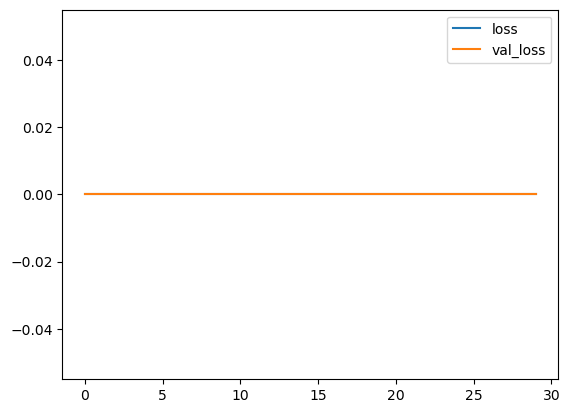

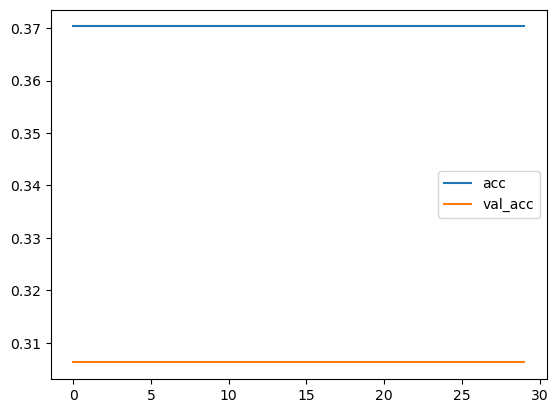

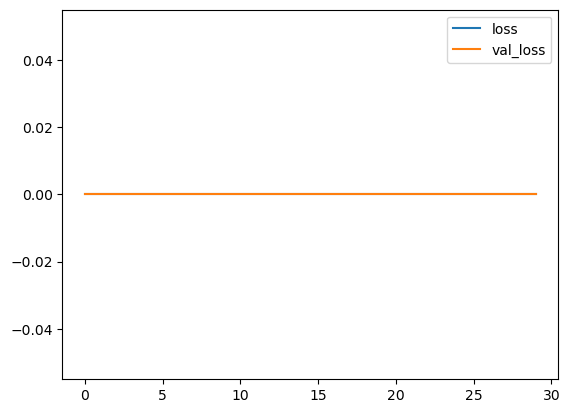

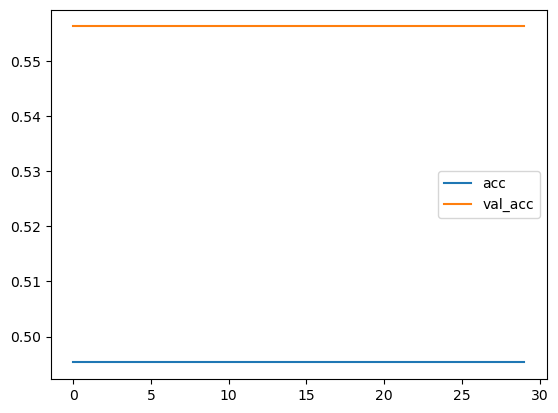

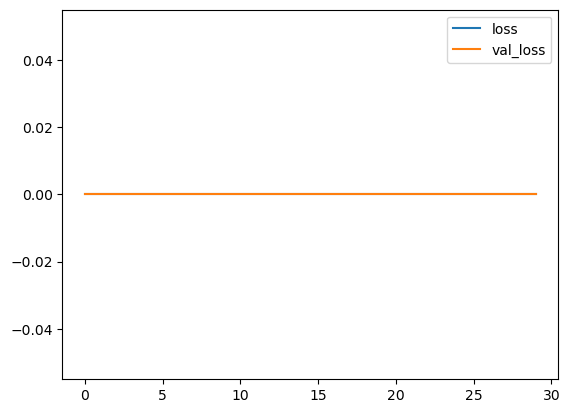

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [111]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

<AxesSubplot:>

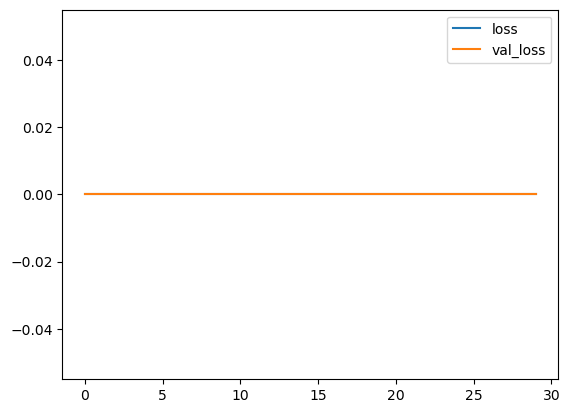

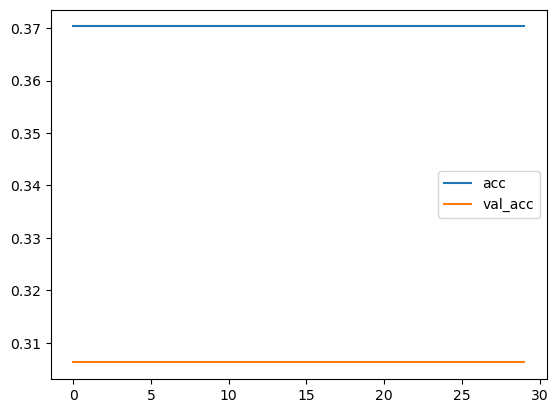

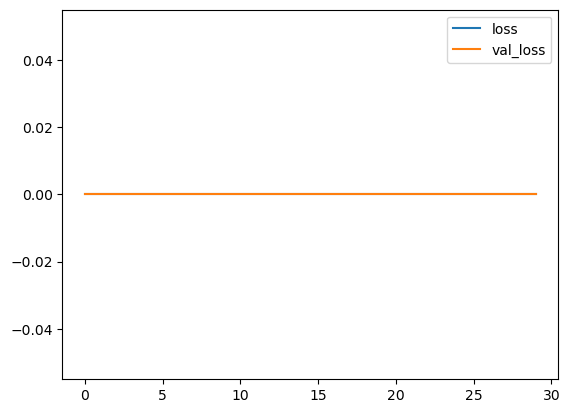

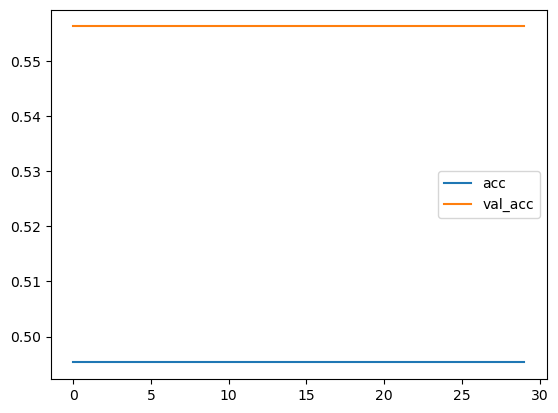

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [71]:
losses[['acc','val_acc']].plot()

In [112]:
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

63/63 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - acc: 0.3545
Model evaluation accuracy:  35 %


In [113]:
y_pred2 = model.predict(x_test2, batch_size=5)
#check scores
scores = model.evaluate(x_test2, y_test2)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

63/63 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - acc: 0.4890
Model evaluation accuracy:  49 %


In [114]:
model.save('heart_sounds.h5')

In [74]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

7/7 [==============================] - 1s 12ms/step


NameError: name 'int_to_label' is not defined

In [ ]:
y_pred2 = np.asarray(model.predict(x_test2, batch_size=32))
y_pred2 = np.argmax(y_pred2,axis=1)
print ("prediction test return :",y_pred2[1], "-", int_to_label[y_pred2[1]])

In [ ]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
y_pred2 = np.asarray(model.predict(x_test2, batch_size=32))
y_pred2 = np.argmax(y_pred2,axis=1)

In [ ]:
target_names = ["ESM", "PSM"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

In [ ]:
target_names = ["diastolic", "systolic"]
print(classification_report(y_test.argmax(axis=1), y_pred2, target_names = target_names))

In [155]:
import tensorflow as tf
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)
y_train = np.array(tf.keras.utils.to_categorical(y_train, 2))
y_test = np.array(tf.keras.utils.to_categorical(y_test, 2))
y_val = np.array(tf.keras.utils.to_categorical(y_val, 2))
input_shape = (26,)

input_layer = tf.keras.layers.Input(shape=input_shape)

hidden_layer1 = tf.keras.layers.Dense(1024, activation='relu')(input_layer)
hidden_layer2 = tf.keras.layers.Dense(512, activation='relu')(hidden_layer1)
dropout_layer_1 = tf.keras.layers.Dropout(0.5)(hidden_layer2)
hidden_layer3 = tf.keras.layers.Dense(256, activation='relu')(dropout_layer_1)
hidden_layer4 = tf.keras.layers.Dense(128, activation='relu')(hidden_layer3)
hidden_layer5 = tf.keras.layers.Dense(64, activation='relu')(hidden_layer4)
dropout_layer_2 = tf.keras.layers.Dropout(0.5)(hidden_layer5)
hidden_layer4 = tf.keras.layers.Dense(32, activation='relu')(dropout_layer_2)
output_layer = tf.keras.layers.Dense(2, activation='softmax')(hidden_layer5)

model2 = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model2.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1024)           │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 725,058 (2.77 MB)

 Trainable params: 725,058 (2.77 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
model2.fit(x_train,y_train,batch_size=1024,epochs=50)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3431 - loss: 11.6474
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8061 - loss: 3.7995
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7743 - loss: 2.7623
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5952 - loss: 1.9755
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6822 - loss: 1.4737
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7580 - loss: 1.4150
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6874 - loss: 1.2267
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6858 - loss: 1.0707
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7321 - loss: 0.9878
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7232 - loss: 0.8832
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7165 - loss: 0.8375
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7439 - loss: 0.7906


In [117]:
model2.fit(x_train2,y_train2,batch_size=1024,epochs=50)

Epoch 1/50
7/7 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 2/50
7/7 [==============================] - 0s 37ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 3/50
7/7 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 4/50
7/7 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 5/50
7/7 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 6/50
7/7 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 7/50
7/7 [==============================] - 0s 39ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 8/50
7/7 [==============================] - 0s 38ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 9/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 0.4900
Epoch 10/50
7/7 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accura

In [ ]:
y_pred = model2.predict(x_test, batch_size=5)
#check scores
scores = model2.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

In [159]:
y_pred = model.predict(x_test, batch_size=5)
#check scores
scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_test = np.argmax(y_test, axis=1)
y_pred = y_pred[:, 1].
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

383/383 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 1.0000 - loss: 1.7187e-08
Model evaluation accuracy:  100 %


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [119]:
y_pred2 = model2.predict(x_test2, batch_size=5)
#check scores
scores = model2.evaluate(x_test2, y_test2)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

63/63 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.4890
Model evaluation accuracy:  49 %


In [ ]:
model = models.Sequential()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, 2))
y_test = np.array(tf.keras.utils.to_categorical(y_test, 2))
y_val = np.array(tf.keras.utils.to_categorical(y_val, 2))
# Convolutional layers for local feature extraction
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(26, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
#model.add(layers.Flatten())

# Bidirectional GRU for capturing sequential dependencies
model.add(layers.Bidirectional(layers.GRU(64, activation='relu', dropout=0.2, recurrent_dropout=0.2)))

# Dense layers for further processing
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)
from sklearn.metrics import accuracy_score
# Evaluate the model on the test set
y_pred = (model.predict(x_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy}")

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_pred = y_pred[:, 1] 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
model = models.Sequential()
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, 2))
y_test = np.array(tf.keras.utils.to_categorical(y_test, 2))
y_val = np.array(tf.keras.utils.to_categorical(y_val, 2))
#test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))
# Convolutional layers for spatial feature extraction
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(26, 1)))
model.add(layers.MaxPooling1D(pool_size=2))

# LSTM layer for capturing temporal dependencies
model.add(layers.LSTM(64, activation='relu', dropout=0.2, recurrent_dropout=0.2))

# Dense layers for further processing
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))  # For binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = (model.predict(x_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy}")

In [ ]:
y_test = np.argmax(y_test, axis=1)
y_pred = y_pred[:, 1] 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.7, random_state=42, shuffle=True)

# One-Hot encoding for classes
y_train = np.array(tf.keras.utils.to_categorical(y_train, 2))
y_test = np.array(tf.keras.utils.to_categorical(y_test, 2))
y_val = np.array(tf.keras.utils.to_categorical(y_val, 2))
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(26, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype(int)
#y_test = np.argmax(y_test, axis=1)
#y_pred = y_pred[:, 1]
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy}")
#y_test = np.argmax(y_test, axis=1)
#y_pred = y_pred[:, 1] 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()